In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import math
import seaborn as sns
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import accuracy_score, classification_report,precision_score
from sklearn.preprocessing import StandardScaler



In [66]:
df = pd.read_csv('Country-data.csv')

In [67]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                 country income_gdp_category  cluster
0            Afghanistan                 low        1
1                Albania                 low        1
2                Algeria              medium        1
3                 Angola                 low        1
4    Antigua and Barbuda              medium        1
..                   ...                 ...      ...
162              Vanuatu                 low        1
163            Venezuela              medium        1
164              Vietnam                 low        1
165                Yemen                 low        1
166               Zambia                 low        1

[167 rows x 3 columns]


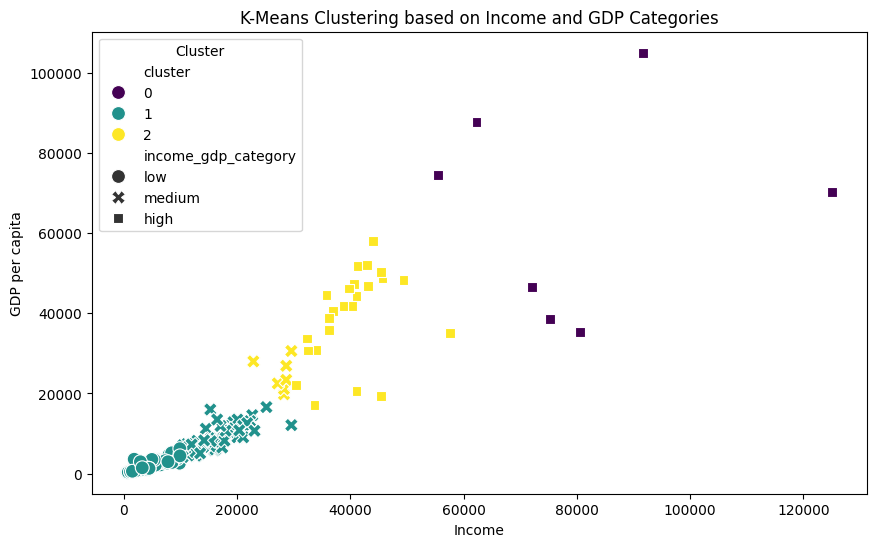

Davies Bouldin Score:  0.7297501384687829
Silhouette Score:  0.7014465915503129
Adjusted Rand Score:  0.40717530637779037
Calinski Harabasz Score:  360.62646264121355


In [70]:
from sklearn.cluster import KMeans

# Create a new feature based on income and GDP categories
df['income_gdp_category'] = df['income'].apply(lambda x: 'High' if x > 10000 else 'Medium' if x > 3000 else 'Low')

# Extract the numerical features for clustering
X = df[['income', 'gdpp']]

scaler = StandardScaler()
X = scaler.fit_transform(X)

num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Print the countries, income_gdp_category, and their respective clusters
result = pd.concat([df[['country', 'income_gdp_category']], df['cluster']], axis=1)
print(result)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='gdpp', hue='cluster', style='income_gdp_category', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering based on Income and GDP Categories')
plt.xlabel('Income')
plt.ylabel('GDP per capita')
plt.legend(title='Cluster')
plt.show()

#Score
print('Davies Bouldin Score: ', davies_bouldin_score(X, df['cluster']))
print('Silhouette Score: ', silhouette_score(X, df['cluster']))
print('Adjusted Rand Score: ', adjusted_rand_score(df['income_gdp_category'], df['cluster']))
print('Calinski Harabasz Score: ', calinski_harabasz_score(X, df['cluster']))

                 country income_gdp_category  cluster
0            Afghanistan                 low        2
1                Albania                 low        2
2                Algeria              medium        2
3                 Angola                 low        2
4    Antigua and Barbuda              medium        1
..                   ...                 ...      ...
162              Vanuatu                 low        2
163            Venezuela              medium        1
164              Vietnam                 low        2
165                Yemen                 low        2
166               Zambia                 low        2

[167 rows x 3 columns]


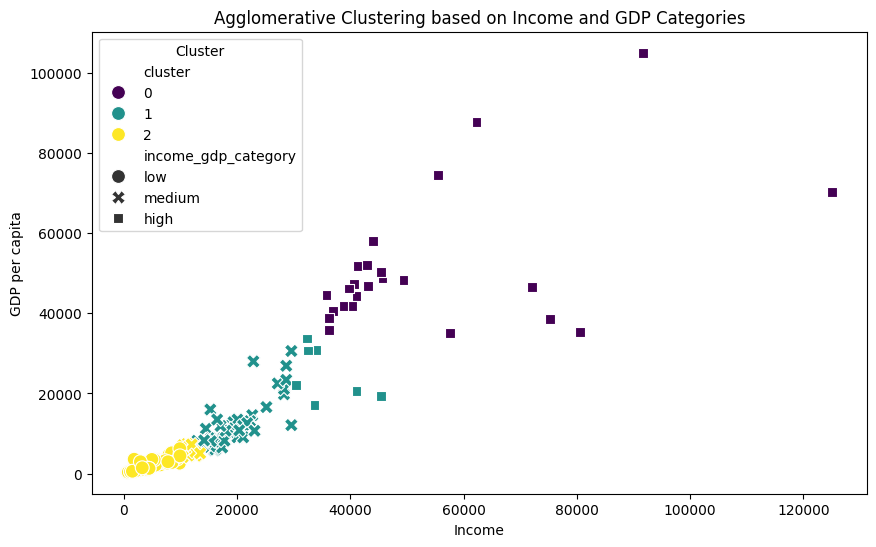

Davies Bouldin Score:  0.6363186806577801
Silhouette Score:  0.5823127847013743
Adjusted Rand Score:  0.7189168142710226
Calinski Harabasz Score:  305.9332855605707


In [ ]:
#Another Cluster Method
from sklearn.cluster import AgglomerativeClustering

# Apply agglomerative clustering
agg = AgglomerativeClustering(n_clusters=num_clusters)
df['cluster'] = agg.fit_predict(X)

# Print the countries, income_gdp_category, and their respective clusters
result = pd.concat([df[['country', 'income_gdp_category']], df['cluster']], axis=1)
print(result)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='gdpp', hue='cluster', style='income_gdp_category', data=df, palette='viridis', s=100)
plt.title('Agglomerative Clustering based on Income and GDP Categories')
plt.xlabel('Income')
plt.ylabel('GDP per capita')
plt.legend(title='Cluster')
plt.show()

#Score
print('Davies Bouldin Score: ', davies_bouldin_score(X, df['cluster']))
print('Silhouette Score: ', silhouette_score(X, df['cluster']))
print('Adjusted Rand Score: ', adjusted_rand_score(df['income_gdp_category'], df['cluster']))
print('Calinski Harabasz Score: ', calinski_harabasz_score(X, df['cluster']))


                 country income_gdp_category  cluster
0            Afghanistan                 low        0
1                Albania                 low        0
2                Algeria              medium        0
3                 Angola                 low        0
4    Antigua and Barbuda              medium        0
..                   ...                 ...      ...
162              Vanuatu                 low        0
163            Venezuela              medium        0
164              Vietnam                 low        0
165                Yemen                 low        0
166               Zambia                 low        0

[167 rows x 3 columns]


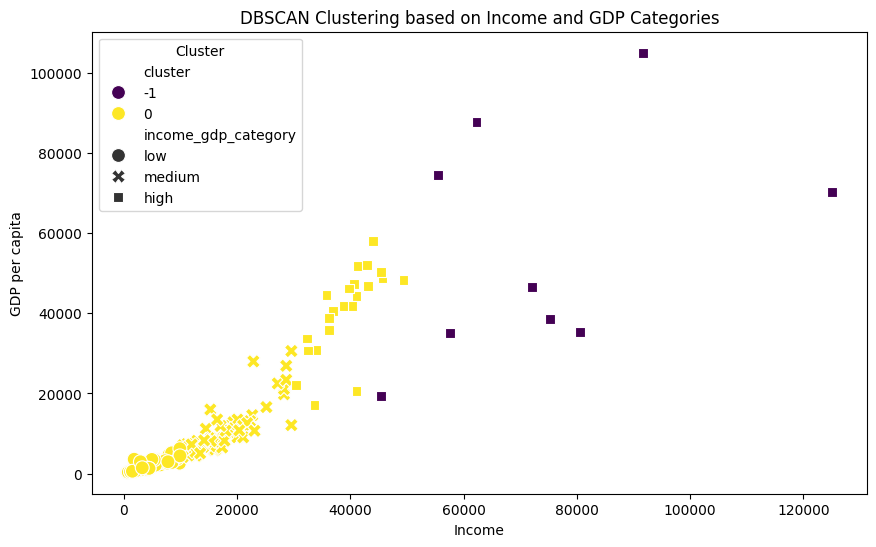

Davies Bouldin Score:  0.6691010529377834
Silhouette Score:  0.6663387963601601
Adjusted Rand Score:  0.09129526609361355
Calinski Harabasz Score:  112.24465760335366


In [ ]:
#Another Cluster Method
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(X)

# Print the countries, income_gdp_category, and their respective clusters
result = pd.concat([df[['country', 'income_gdp_category']], df['cluster']], axis=1)
print(result)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='gdpp', hue='cluster', style='income_gdp_category', data=df, palette='viridis', s=100)
plt.title('DBSCAN Clustering based on Income and GDP Categories')
plt.xlabel('Income')
plt.ylabel('GDP per capita')
plt.legend(title='Cluster')
plt.show()

#Score
print('Davies Bouldin Score: ', davies_bouldin_score(X, df['cluster']))
print('Silhouette Score: ', silhouette_score(X, df['cluster']))
print('Adjusted Rand Score: ', adjusted_rand_score(df['income_gdp_category'], df['cluster']))
print('Calinski Harabasz Score: ', calinski_harabasz_score(X, df['cluster']))


                 country income_gdp_category  cluster
0            Afghanistan                 low        0
1                Albania                 low        0
2                Algeria              medium        0
3                 Angola                 low        0
4    Antigua and Barbuda              medium        0
..                   ...                 ...      ...
162              Vanuatu                 low        0
163            Venezuela              medium        0
164              Vietnam                 low        0
165                Yemen                 low        0
166               Zambia                 low        0

[167 rows x 3 columns]


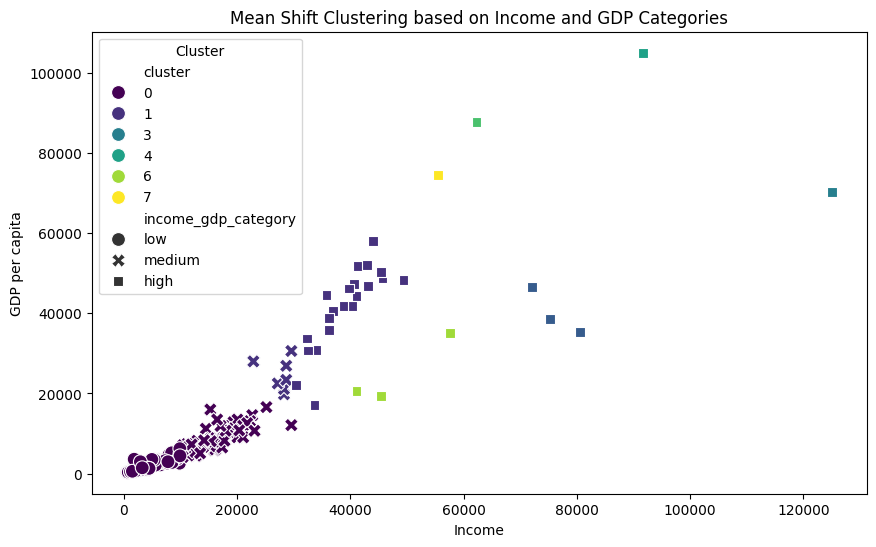

Davies Bouldin Score:  0.4865693223239863
Silhouette Score:  0.6540471526426312
Adjusted Rand Score:  0.3945118342380954
Calinski Harabasz Score:  176.85220856190017


In [ ]:

#Another Cluster Method
from sklearn.cluster import MeanShift

# Apply mean shift clustering
ms = MeanShift()
df['cluster'] = ms.fit_predict(X)

# Print the countries, income_gdp_category, and their respective clusters
result = pd.concat([df[['country', 'income_gdp_category']], df['cluster']], axis=1)
print(result)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='gdpp', hue='cluster', style='income_gdp_category', data=df, palette='viridis', s=100)
plt.title('Mean Shift Clustering based on Income and GDP Categories')
plt.xlabel('Income')
plt.ylabel('GDP per capita')
plt.legend(title='Cluster')
plt.show()

#Score
print('Davies Bouldin Score: ', davies_bouldin_score(X, df['cluster']))
print('Silhouette Score: ', silhouette_score(X, df['cluster']))
print('Adjusted Rand Score: ', adjusted_rand_score(df['income_gdp_category'], df['cluster']))
print('Calinski Harabasz Score: ', calinski_harabasz_score(X, df['cluster']))
